In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
data = pd.read_csv('checkins.dat', delimiter='|')

In [95]:
data.columns

Index([u'   id    ', u' user_id ', u' venue_id ', u'     latitude      ',
       u'     longitude     ', u'     created_at      '],
      dtype='object')

In [96]:
cols = [col.strip() for col in data.columns]
print cols

['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at']


In [97]:
data.columns=cols

In [98]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,---------+---------+----------+---------------...,NaN,NaN,NaN,NaN,NaN
1,984301,2041916.0,5222.0,,,2012-04-21 17:39:01
2,984222,15824.0,5222.0,38.8951118,-77.0363658,2012-04-21 17:43:47
3,984315,1764391.0,5222.0,,,2012-04-21 17:37:18
4,984234,44652.0,5222.0,33.800745,-84.41052,2012-04-21 17:43:43


In [99]:
len(data)

1021968

In [113]:
data.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [117]:
data.dropna(subset=['latitude','longitude'],how='any', inplace = True)

In [118]:
len(data)

396634

In [116]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.8951118,-77.0363658,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.41052,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.5234515,-122.6762071,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.4483771,-112.0740373,2012-04-21 17:38:18


In [119]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [123]:
X = data[['latitude', 'longitude']]
X = X[:100000]
X.head()

,latitude,longitude
2,38.8951118,-77.0363658
4,33.800745,-84.41052
8,45.5234515,-122.6762071
10,40.764462,-111.904565
11,33.4483771,-112.0740373


In [124]:
len(X)

100000

In [148]:
ms = MeanShift(bandwidth=0.1,min_bin_freq=15)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [156]:
print cluster_centers[0]

[ 40.7177164  -73.99183542]


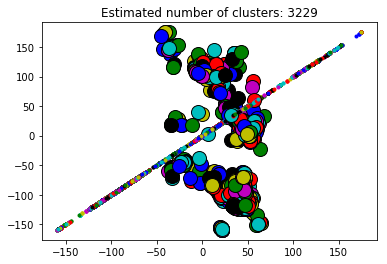

In [152]:
#%% Plot result
n_clusters_ = labels.max()+1
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members], X[my_members], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],'o', markerfacecolor=col,markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [271]:
offices = np.array([], dtype = float64)

array1 = np.array([33.751277, -118.188740],dtype = float32)
array2 = np.array([25.867736, -80.324116],dtype = float64)
array3 = np.array([51.503016, -0.075479],dtype = float64)
array4 = np.array([52.378894, 4.885084],dtype = float64)
array5 = np.array([39.366487, 117.036146],dtype = float64)
array6 = np.array([-33.868457, 151.205134],dtype = float64)

offices = np.append([array1, array2,array3,array4,
                     array5],[array6], axis=0)

In [274]:
print np.around(offices,4)

[[  3.37513000e+01  -1.18188700e+02]
 [  2.58677000e+01  -8.03241000e+01]
 [  5.15030000e+01  -7.55000000e-02]
 [  5.23789000e+01   4.88510000e+00]
 [  3.93665000e+01   1.17036100e+02]
 [ -3.38685000e+01   1.51205100e+02]]


In [254]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

counts = dict()

for i in range(len(labels)):
    if counts.has_key(labels[i]):
        counts[labels[i]]+=1
    else:
        counts[labels[i]]=1
        

interesting_labels = [label for label in labels_unique if counts[label]>15]
points = [cluster_centers[i] for i in range(len(cluster_centers)) if interesting_labels.count(labels[i])>0]

best_points=[]
dist=[]
for point in points:
    best_dist=1000000
    for office in offices:
        d = np.sqrt((point[0]-office[0])*2+(point[1]-office[1])*2)
        if d<best_dist:
            best_dist=d
    dist.append(best_dist)

dist = np.array(dist)
idxs = np.argsort(dist)[:20]

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [255]:
points=np.array(points)
for point in points[idxs]:
    print "%f,%f" % (point[0], point[1])

52.372964,4.892317
32.792575,-117.224743
-33.860630,151.204776
37.591120,-122.020735
35.463416,-89.910086
34.257607,-88.703386
52.921899,-1.475642
25.785812,-80.217938
37.693034,-122.097845
38.232417,-122.636652
34.035487,-118.438998
47.015240,10.293670
48.849920,2.637041
38.334893,-122.704326
52.634770,-1.129519
34.198182,-118.549277
56.837814,60.596842
33.211757,-87.569979
33.809878,-118.148924
28.030303,-82.379539
